In [1]:
# Descomentar para actualizar librerias
# Si se actualiza alguna libreria hay que reiniciar el notebook
!pip install pandas --upgrade  --quiet
!pip install numpy --upgrade  --quiet
!pip install scipy --upgrade  --quiet
!pip install statsmodels --upgrade  --quiet
!pip install scikit-learn --upgrade  --quiet
!pip install missingno --upgrade  --quiet
!pip install apafib --upgrade --quiet

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split,  KFold, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn import set_config

from yellowbrick.regressor import AlphaSelection, PredictionError, ResidualsPlot

from statsmodels.genmod.generalized_linear_model import GLM
import statsmodels.api as sm
from scipy import stats

import warnings

from pandas.plotting import scatter_matrix
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.precision', 3)

In [4]:
from apafib import load_BCN_calor
bcn_calor = load_BCN_calor()
bcn_calor.head()

,VisitantesMunicipales-Badalona,VisitantesMunicipales-L'Hospitalet de Llobregat,VisitantesMunicipales-Sabadell,VisitantesMunicipales-Santa Coloma de Gramenet,VisitantesMunicipales-Terrassa,VisitantesPais-Alemanya,VisitantesPais-França,VisitantesPais-Regne Unit,VisitantesPais-Itàlia,VisitantesPais-Estats Units. els,VisitantesProvincia-Girona,VisitantesProvincia-Illes Balears,VisitantesProvincia-Lleida,VisitantesProvincia-Madrid,VisitantesProvincia-Tarragona,Temperatura-Barcelona - Zona Universitària
Dia,,,,,,,,,,,,,,,,
2022-05-12,74012.0,90434.0,19594.0,37327.0,25037.0,14497.0,31400.0,16981.0,15845.0,22314.0,28064.0,6629.0,10365.0,15216.0,24906.0,19.68
2022-05-13,74601.0,90449.0,20290.0,36932.0,24687.0,17092.0,35726.0,15762.0,20012.0,25189.0,27754.0,8224.0,10495.0,17122.0,23478.0,19.13
2022-05-14,61050.0,81027.0,19391.0,33755.0,23209.0,13479.0,40012.0,13940.0,21001.0,24664.0,25489.0,7433.0,9976.0,16131.0,21068.0,21.52
2022-05-15,54080.0,74599.0,16397.0,32933.0,21983.0,12977.0,36913.0,14621.0,20172.0,25764.0,23510.0,7152.0,9507.0,16214.0,17642.0,22.32
2022-05-16,73664.0,89460.0,18791.0,37181.0,24275.0,11895.0,30336.0,12725.0,17318.0,23073.0,28191.0,6527.0,11035.0,15512.0,25095.0,22.25


In [5]:
bcn_calor.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
VisitantesMunicipales-Badalona,610.0,67185.284,8366.174,41690.00,61149.500,69045.00,73792.250,82270.00
VisitantesMunicipales-L'Hospitalet de Llobregat,610.0,94134.159,10641.600,60441.00,86461.750,94500.00,101468.000,115812.00
VisitantesMunicipales-Sabadell,610.0,21836.607,3491.920,11692.00,19425.750,22064.50,24810.250,30013.00
VisitantesMunicipales-Santa Coloma de Gramenet,610.0,45444.441,6222.033,26127.00,41238.750,46829.50,49493.750,56954.00
VisitantesMunicipales-Terrassa,610.0,23979.710,3595.445,13689.00,21439.250,24785.00,26787.250,34081.00
VisitantesPais-Alemanya,610.0,12203.454,4134.211,3085.00,9352.500,12295.00,14735.250,25467.00
VisitantesPais-França,610.0,33897.423,16333.154,6518.00,22711.000,29987.00,41123.500,96196.00
VisitantesPais-Regne Unit,610.0,12840.953,3388.872,3973.00,11151.750,13220.00,14802.000,23379.00
VisitantesPais-Itàlia,610.0,21423.402,6940.226,6044.00,16475.750,20376.50,25736.000,46467.00
VisitantesPais-Estats Units. els,610.0,23941.375,12731.219,3231.00,14460.750,23549.50,32662.250,64688.00


No hi ha variables categoriques, totes les variables serveixen per a la tasca objectiu

In [6]:
#ordenem columnes per tal que la objectiu estigui la primera
cols = list(bcn_calor.columns)
cols.remove('Temperatura-Barcelona - Zona Universitària')
cols.insert(0, 'Temperatura-Barcelona - Zona Universitària')
bcn_calor = bcn_calor.reindex(columns=cols)
bcn_calor.head()

,Temperatura-Barcelona - Zona Universitària,VisitantesMunicipales-Badalona,VisitantesMunicipales-L'Hospitalet de Llobregat,VisitantesMunicipales-Sabadell,VisitantesMunicipales-Santa Coloma de Gramenet,VisitantesMunicipales-Terrassa,VisitantesPais-Alemanya,VisitantesPais-França,VisitantesPais-Regne Unit,VisitantesPais-Itàlia,VisitantesPais-Estats Units. els,VisitantesProvincia-Girona,VisitantesProvincia-Illes Balears,VisitantesProvincia-Lleida,VisitantesProvincia-Madrid,VisitantesProvincia-Tarragona
Dia,,,,,,,,,,,,,,,,
2022-05-12,19.68,74012.0,90434.0,19594.0,37327.0,25037.0,14497.0,31400.0,16981.0,15845.0,22314.0,28064.0,6629.0,10365.0,15216.0,24906.0
2022-05-13,19.13,74601.0,90449.0,20290.0,36932.0,24687.0,17092.0,35726.0,15762.0,20012.0,25189.0,27754.0,8224.0,10495.0,17122.0,23478.0
2022-05-14,21.52,61050.0,81027.0,19391.0,33755.0,23209.0,13479.0,40012.0,13940.0,21001.0,24664.0,25489.0,7433.0,9976.0,16131.0,21068.0
2022-05-15,22.32,54080.0,74599.0,16397.0,32933.0,21983.0,12977.0,36913.0,14621.0,20172.0,25764.0,23510.0,7152.0,9507.0,16214.0,17642.0
2022-05-16,22.25,73664.0,89460.0,18791.0,37181.0,24275.0,11895.0,30336.0,12725.0,17318.0,23073.0,28191.0,6527.0,11035.0,15512.0,25095.0


Partim les dades en entrenament i test

In [7]:
bcn_calor_train, bcn_calor_test = train_test_split(bcn_calor, test_size=0.4, random_state=0)

## Visualización básica

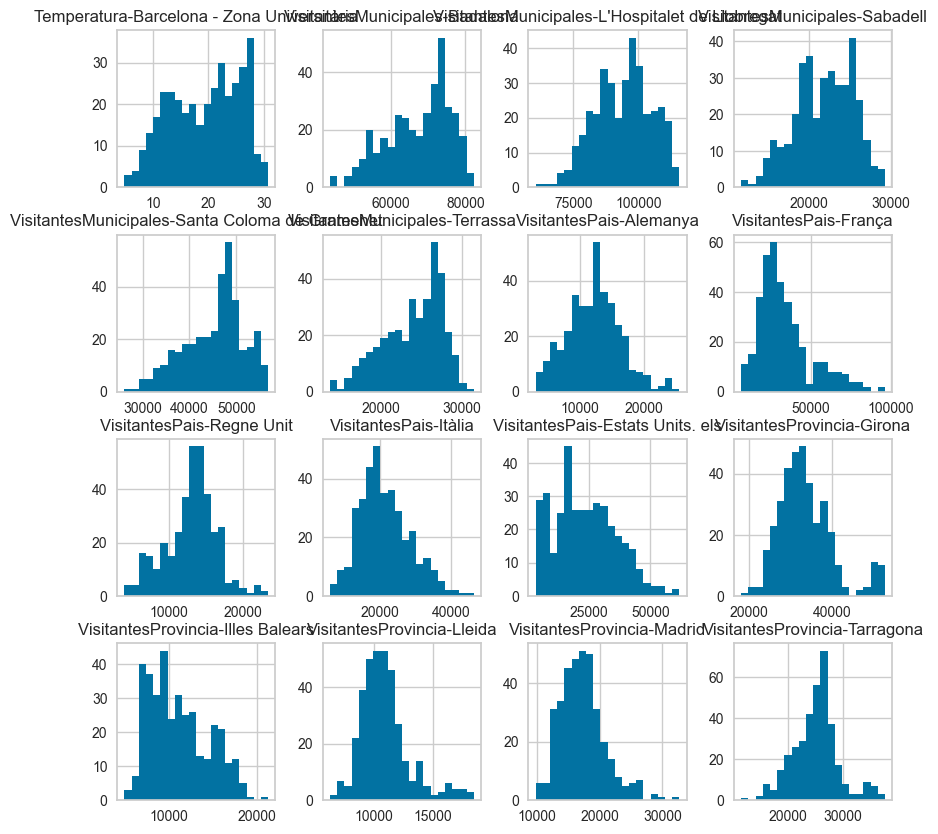

In [8]:
bcn_calor_train.loc[:,['Temperatura-Barcelona - Zona Universitària', 'VisitantesMunicipales-Badalona', 'VisitantesMunicipales-L\'Hospitalet de Llobregat','VisitantesMunicipales-Sabadell','VisitantesMunicipales-Santa Coloma de Gramenet', 'VisitantesMunicipales-Terrassa', 'VisitantesPais-Alemanya','VisitantesPais-França', 'VisitantesPais-Regne Unit', 'VisitantesPais-Itàlia', 'VisitantesPais-Estats Units. els', 'VisitantesProvincia-Girona', 'VisitantesProvincia-Illes Balears', 'VisitantesProvincia-Lleida', 'VisitantesProvincia-Madrid', 'VisitantesProvincia-Tarragona']].hist(bins=20, figsize=(10,10));

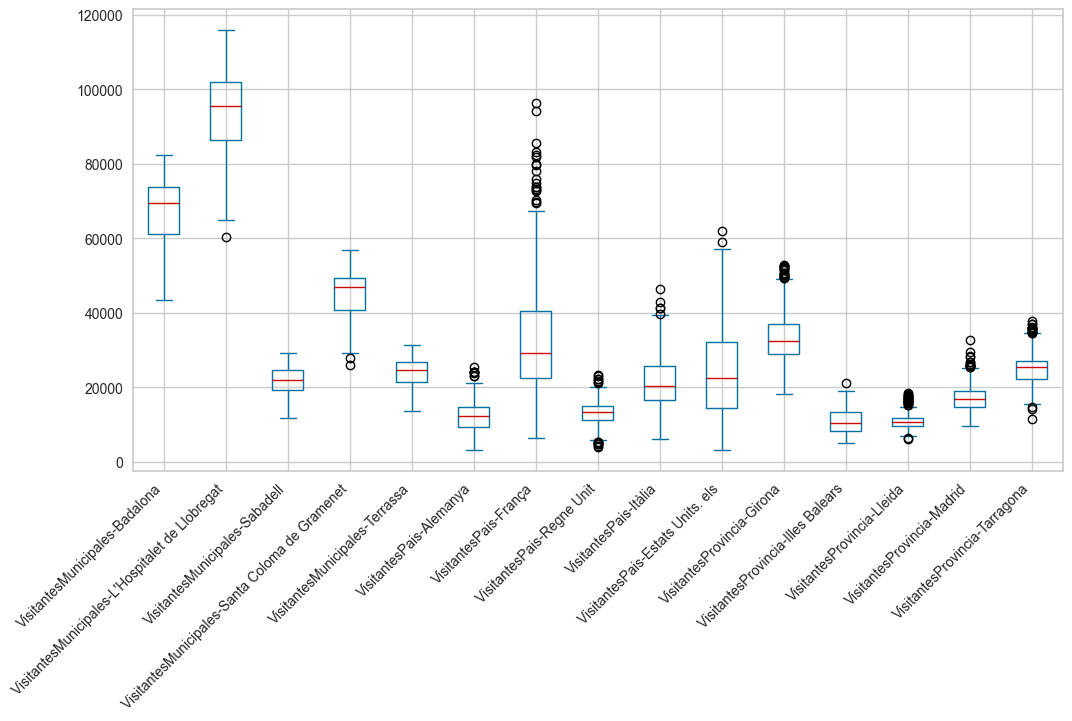

In [9]:
bcn_calor_train.loc[:,[ 'VisitantesMunicipales-Badalona', 'VisitantesMunicipales-L\'Hospitalet de Llobregat','VisitantesMunicipales-Sabadell','VisitantesMunicipales-Santa Coloma de Gramenet', 'VisitantesMunicipales-Terrassa', 'VisitantesPais-Alemanya','VisitantesPais-França', 'VisitantesPais-Regne Unit', 'VisitantesPais-Itàlia', 'VisitantesPais-Estats Units. els', 'VisitantesProvincia-Girona', 'VisitantesProvincia-Illes Balears', 'VisitantesProvincia-Lleida', 'VisitantesProvincia-Madrid', 'VisitantesProvincia-Tarragona']].plot.box(figsize=(12,6));
plt.xticks(rotation=45, ha='right')
plt.show();

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

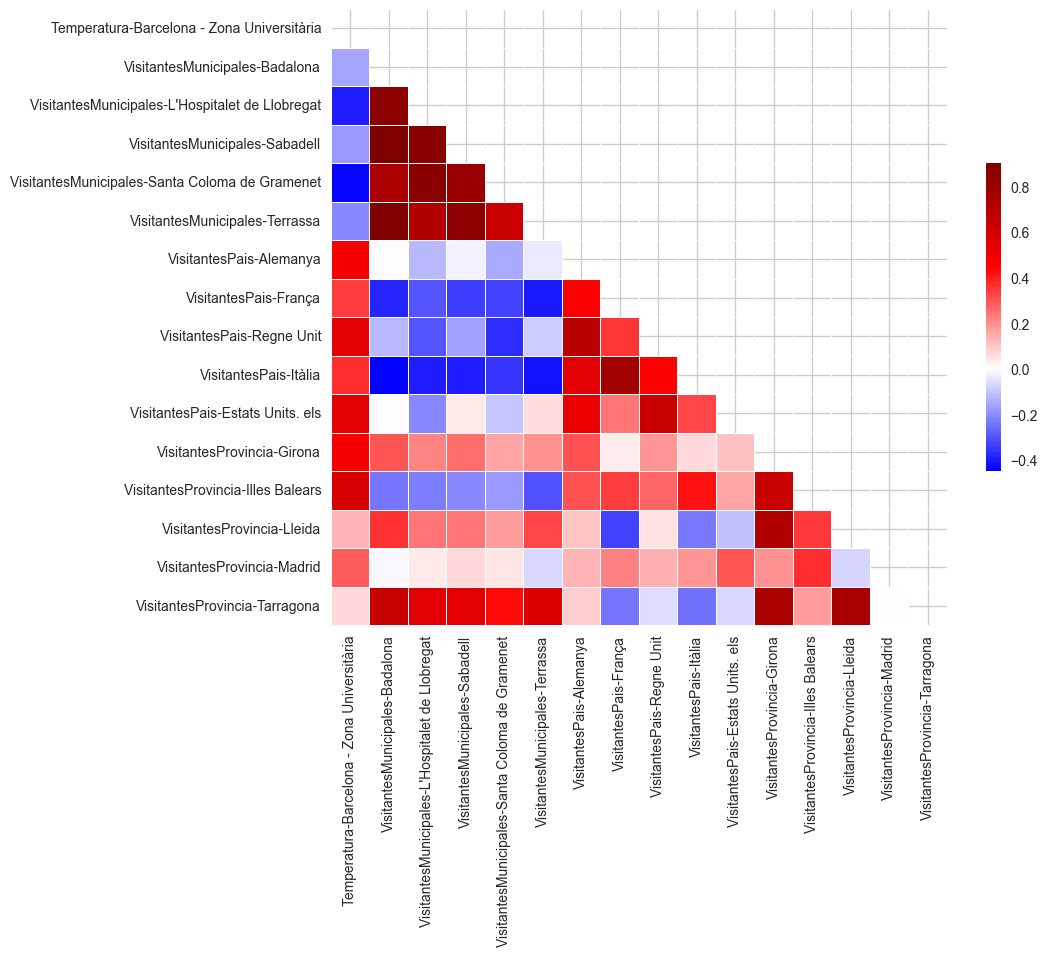

In [11]:
corr = bcn_calor_train.corr(numeric_only=True)
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.subplots(figsize=(10, 8))
sns.heatmap(corr, mask=mask, cmap='seismic',  center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5});

## a)

### Correlació Positiva
VisitantesPaís mostren una forta correlació amb la Temperatura-Barcelona - Zona Universitària.

VisitantesPaís mostren una correlació positiva amb ells.

VisitantesProvíncia - Illes Balears mostren una correlació positiva amb la Temperatura-Barcelona - Zona Universitària.

VisitantesMunicipals mostren una forta correlació positiva entre ells.

VisitantesProvíncia - Lleida, Tarragona mostren una correlació neutra o lleugerament positiva amb la Temperatura-Barcelona - Zona Universitària.

### Correlació Negativa
VisitantesMunicipals mostren una correlació negativa amb la Temperatura-Barcelona - Zona Universitària.

VisitantesMunicipals mostren una correlació negativa amb les variables de visitantsPaís.

VisitantesProvíncia - Illes Balears mostra una correlació negativa amb les variables de visitantsMunicipals.

## Conclusions
Les correlacions positives entre els visitantesPaís i la temperatura, els visitantesPaís i entre ells, i els visitantesProvíncia - Illes Balears, Madrid, Girona i la temperatura es deuen probablement a la presencia de l'estiu. En canvi, hi ha una correlació negativa entre els visitantsMunicipals i la temperatura de Barcelona, degut segurament el fet que aquells que viuen a prop de Barcelona prefereixen evitar-la a l’estiu i anar a altres llocs. La correlació casi neutra observada en els visitantsProvíncia - Lleida, Tarragona i la temperatura es deu a que l’època de l’any no interfereix en el nombre de visitants d’aquests llocs.

## Preparar Regressió Lineal

### Trobar valors perduts

In [12]:
bcn_calor_train.shape

(366, 16)

In [13]:
bcn_calor_test.shape

(244, 16)

In [14]:
bcn_calor_train.isna().sum().sort_values(ascending=False)

Temperatura-Barcelona - Zona Universitària         0
VisitantesMunicipales-Badalona                     0
VisitantesMunicipales-L'Hospitalet de Llobregat    0
VisitantesMunicipales-Sabadell                     0
VisitantesMunicipales-Santa Coloma de Gramenet     0
VisitantesMunicipales-Terrassa                     0
VisitantesPais-Alemanya                            0
VisitantesPais-França                              0
VisitantesPais-Regne Unit                          0
VisitantesPais-Itàlia                              0
VisitantesPais-Estats Units. els                   0
VisitantesProvincia-Girona                         0
VisitantesProvincia-Illes Balears                  0
VisitantesProvincia-Lleida                         0
VisitantesProvincia-Madrid                         0
VisitantesProvincia-Tarragona                      0
dtype: int64

In [15]:
bcn_calor_test.isna().sum().sort_values(ascending=False)

Temperatura-Barcelona - Zona Universitària         0
VisitantesMunicipales-Badalona                     0
VisitantesMunicipales-L'Hospitalet de Llobregat    0
VisitantesMunicipales-Sabadell                     0
VisitantesMunicipales-Santa Coloma de Gramenet     0
VisitantesMunicipales-Terrassa                     0
VisitantesPais-Alemanya                            0
VisitantesPais-França                              0
VisitantesPais-Regne Unit                          0
VisitantesPais-Itàlia                              0
VisitantesPais-Estats Units. els                   0
VisitantesProvincia-Girona                         0
VisitantesProvincia-Illes Balears                  0
VisitantesProvincia-Lleida                         0
VisitantesProvincia-Madrid                         0
VisitantesProvincia-Tarragona                      0
dtype: int64

No hi ha valors perdut

In [16]:
X_train = bcn_calor_train.loc[:,bcn_calor.columns != 'Temperatura-Barcelona - Zona Universitària']
X_test = bcn_calor_test.loc[:,bcn_calor.columns != 'Temperatura-Barcelona - Zona Universitària']
y_train = bcn_calor_train['Temperatura-Barcelona - Zona Universitària']
y_test = bcn_calor_test['Temperatura-Barcelona - Zona Universitària']

Realitzem una regularització de les dades mitjançant una normalització per obtenir bons resultats a les regresions regularitzades.

In [17]:
def scaling_preprocessing(X, y, scaler=None):
    print('Tamaño Original:{}'.format(X.shape))
    categorical_columns = X.dtypes[X.dtypes == 'category'].index.values
    
    # Escalamos las variables numericas
    numerical_columns = [c for c in X.columns if c not in categorical_columns]
    if scaler is None: 
        # Generamos el scaler cuando los datos son los de entrenamiento
        scaler = MinMaxScaler()
        X[numerical_columns] = scaler.fit_transform(X[numerical_columns])
    else: 
        X[numerical_columns] = scaler.transform(X[numerical_columns])

    
    #ESTO NO ES NECESARIO, YA QUE NO TENEMOS VARIABLES CATEGORICAS O MISSINGS
    #######
    # Eliminamos las variables categoricas
    X=X.drop(columns=categorical_columns)
    print('Eliminadas: {}'.format(categorical_columns))
    # Eliminamos los valores perdidos
    X=X.dropna()
    y=y[X.index]
    print('New shape:{}'.format(X.shape))
    return X, y, scaler
    ########


X_train, y_train, scaler = scaling_preprocessing(X_train,y_train)
X_test, y_test, _ = scaling_preprocessing(X_test,y_test,scaler)

Tamaño Original:(366, 15)
Eliminadas: []
New shape:(366, 15)
Tamaño Original:(244, 15)
Eliminadas: []
New shape:(244, 15)


C:\Users\marti.DESKTOP-HBVCDFL\AppData\Local\Temp\ipykernel_31708\933940638.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[numerical_columns] = scaler.fit_transform(X[numerical_columns])
C:\Users\marti.DESKTOP-HBVCDFL\AppData\Local\Temp\ipykernel_31708\933940638.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[numerical_columns] = scaler.transform(X[numerical_columns])


# b) Regressions 

## Regressió Lineal

In [18]:
lr = LinearRegression();
lr.fit(X_train,y_train);
y_pred = lr.predict(X_train);
weights = lr.coef_
intercept = lr.intercept_
print('Coeficientes: \n', weights[:10])
print('Interceptor: \n', intercept)

LinearRegression()

Coeficientes: 
 [ 16.57502726 -10.27722747  10.27315614 -17.53833143  -9.48725479
   1.4276352    0.36726011  -0.31883398  -2.46408576   8.72461552]
Interceptor: 
 18.511284872150114


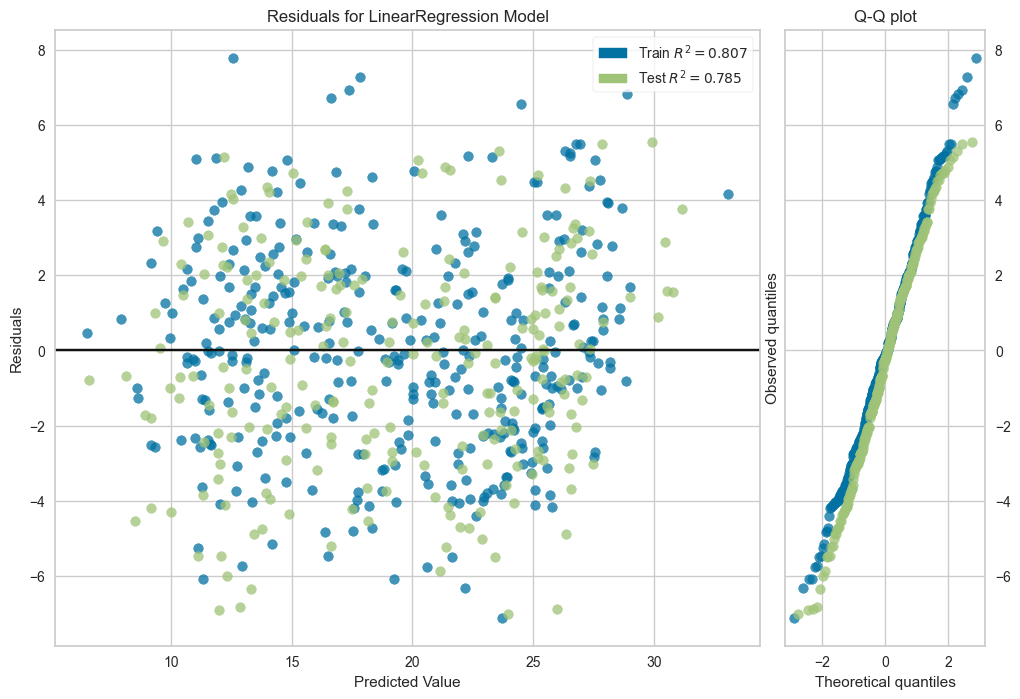

In [19]:
from yellowbrick.regressor import residuals_plot
plt.figure(figsize=(12,8));
viz = residuals_plot(lr, X_train, y_train, X_test, y_test, is_fitted=True, qqplot=True, hist=False);

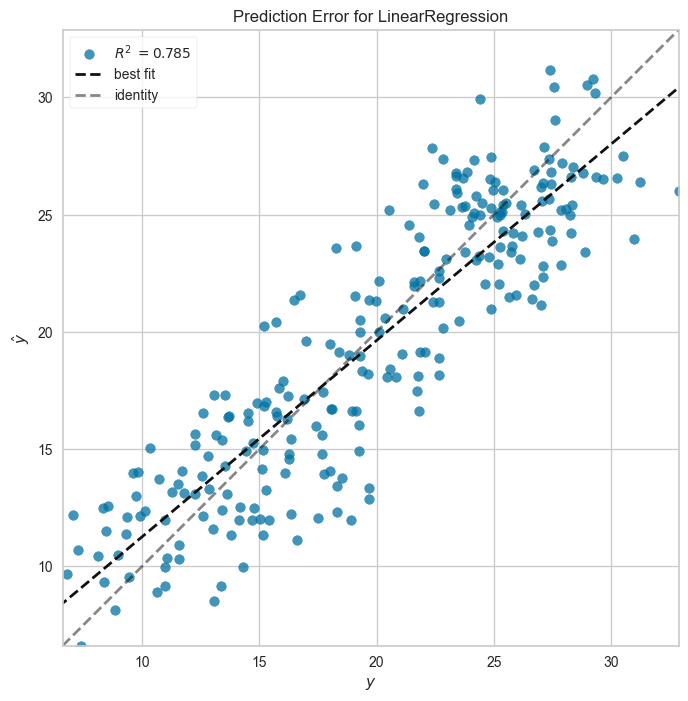

In [20]:
from yellowbrick.regressor import prediction_error

plt.figure(figsize=(8,8))
visualizer = prediction_error(lr, X_test, y_test, is_fitted=True)
0;

In [21]:
folds_r2 = cross_val_score(lr, X_train,y_train, cv=5, scoring='r2')
lr_r2 = np.mean(folds_r2) 
folds_r2, lr_r2

(array([0.77541747, 0.77955312, 0.74855005, 0.83945198, 0.80584775]),
 np.float64(0.789764075794396))

## Regressión lineal regularizada: Ridge

In [22]:
lambdas = [1e-4,1e-3,1e-2,0.1, 0.5,1,5,10,50,100]
ridge_cv = RidgeCV(alphas=lambdas,cv=5).fit(X_train,y_train)

print(f'Best lambda: {ridge_cv.alpha_} R2 score: {ridge_cv.best_score_:3.3f}')

Best lambda: 0.01 R2 score: 0.790


C:\Users\marti.DESKTOP-HBVCDFL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_ridge.py:2341: FutureWarning: 'store_cv_values' is deprecated in version 1.5 and will be removed in 1.7. Use 'store_cv_results' instead.
  warnings.warn(
C:\Users\marti.DESKTOP-HBVCDFL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:102: FutureWarning: Attribute `cv_values_` is deprecated in version 1.5 and will be removed in 1.7. Use `cv_results_` instead.
  warnings.warn(msg, category=FutureWarning)


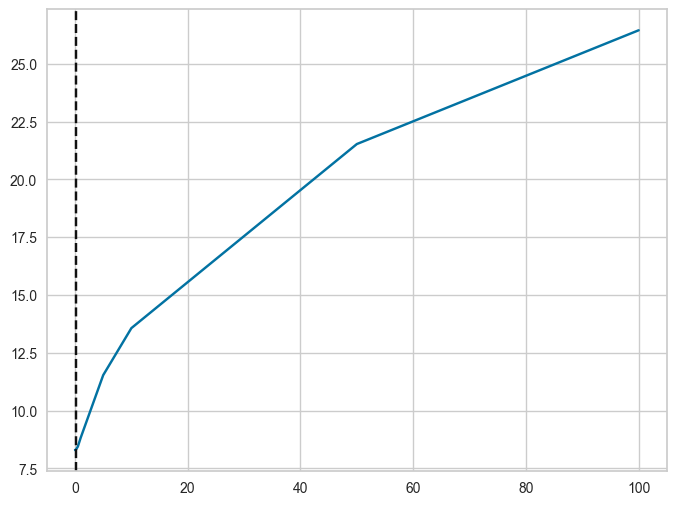

In [23]:
plt.figure(figsize=(8,6))
vis = AlphaSelection(RidgeCV(alphas=lambdas));
vis.fit(X_train, y_train);

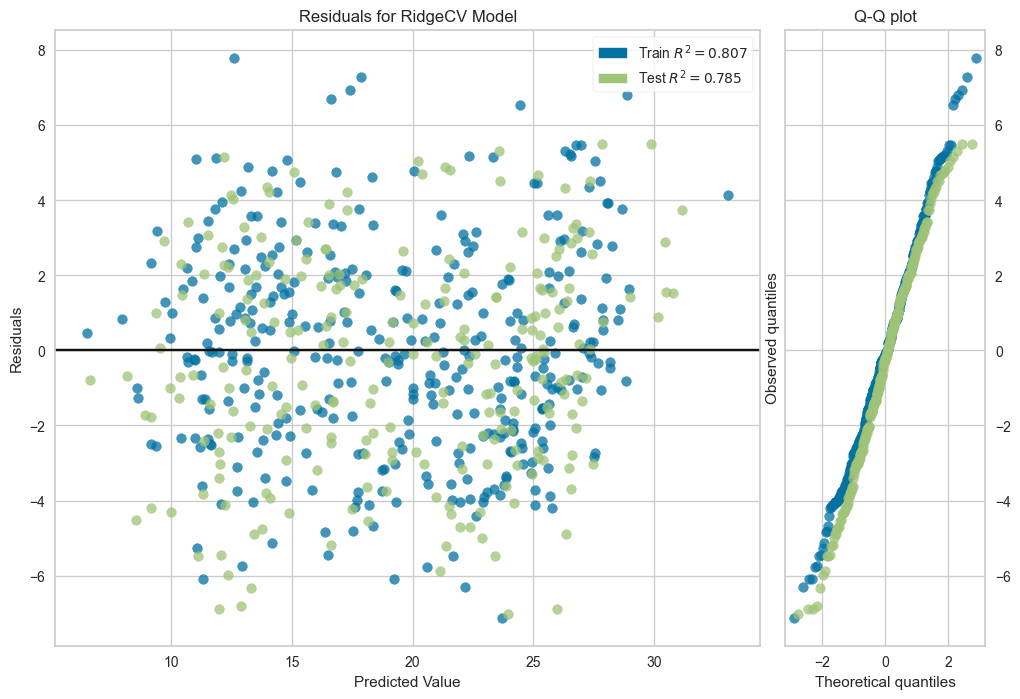

In [24]:
plt.figure(figsize=(12,8));
viz = residuals_plot(ridge_cv, X_train, y_train, X_test, y_test, is_fitted=True, qqplot=True, hist=False);

<Figure size 800x800 with 0 Axes>

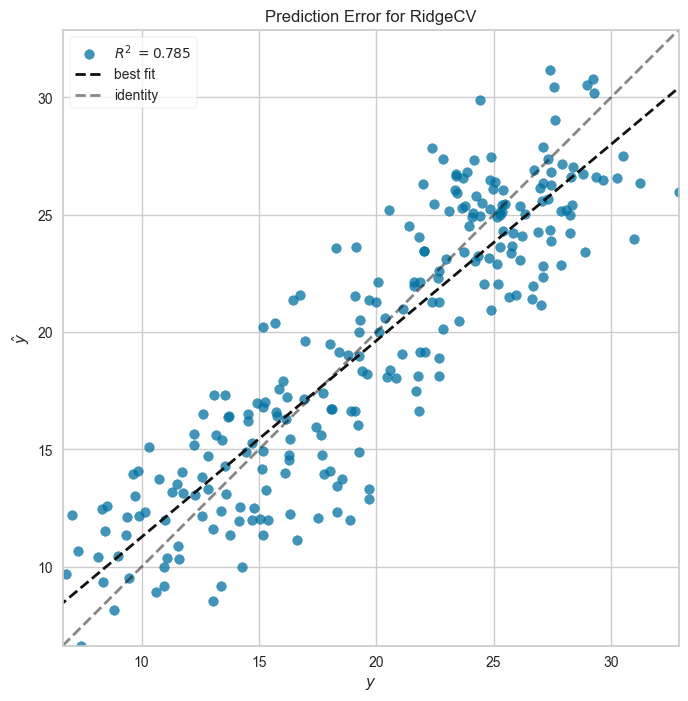

In [25]:
plt.figure(figsize=(8,8))
visualizer = prediction_error(ridge_cv, X_test, y_test, is_fitted=True)

Ridge Regression no sembla millorar els resultats de la regressió lineal. Comprovem si LASSO funciona millor.

## Regressió lineal regularitzada: LASSO


In [26]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LassoCV

lasso_cv = LassoCV(alphas=lambdas,cv=5).fit(X_train,y_train)
coeficientes = lasso_cv.coef_
lasso_r2 =  np.mean(cross_val_score(lasso_cv, X_train,y_train))

print('Best lambda:', lasso_cv.alpha_, 'R2 score:',lasso_r2)
# Revisa qué variables tienen coeficientes diferentes de cero
print('Coeficientes:', coeficientes)

# Variables eliminadas
eliminadas = np.where(coeficientes == 0)[0]
print('Variables eliminadas (índices):', eliminadas)

# Variables retenidas
retenidas = np.where(coeficientes != 0)[0]
print('Variables retenidas (índices):', retenidas)

Best lambda: 0.001 R2 score: 0.7899232492338422
Coeficientes: [ 16.25022669 -10.07995538  10.04732078 -17.41498275  -9.25360737
   1.35906288   0.26807232  -0.14636142  -2.33749748   8.68532292
  14.21484539   9.53561104  -8.18410233  -0.61917553  -3.24451015]
Variables eliminadas (índices): []
Variables retenidas (índices): [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]


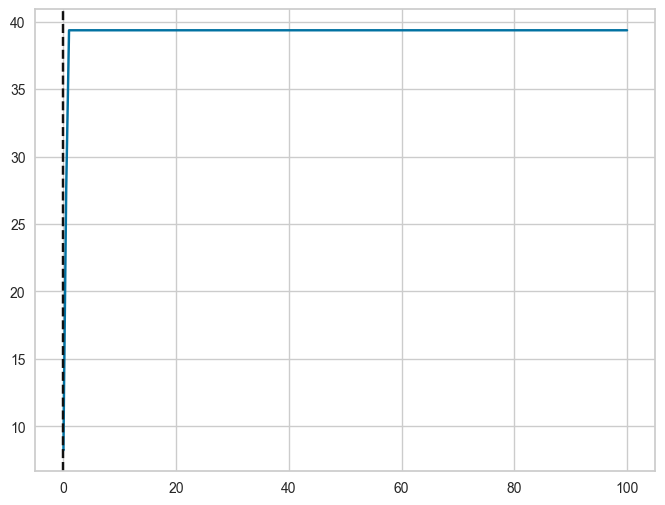

In [27]:
plt.figure(figsize=(8,6))
vis = AlphaSelection(LassoCV(alphas=lambdas));
vis.fit(X_train, y_train);

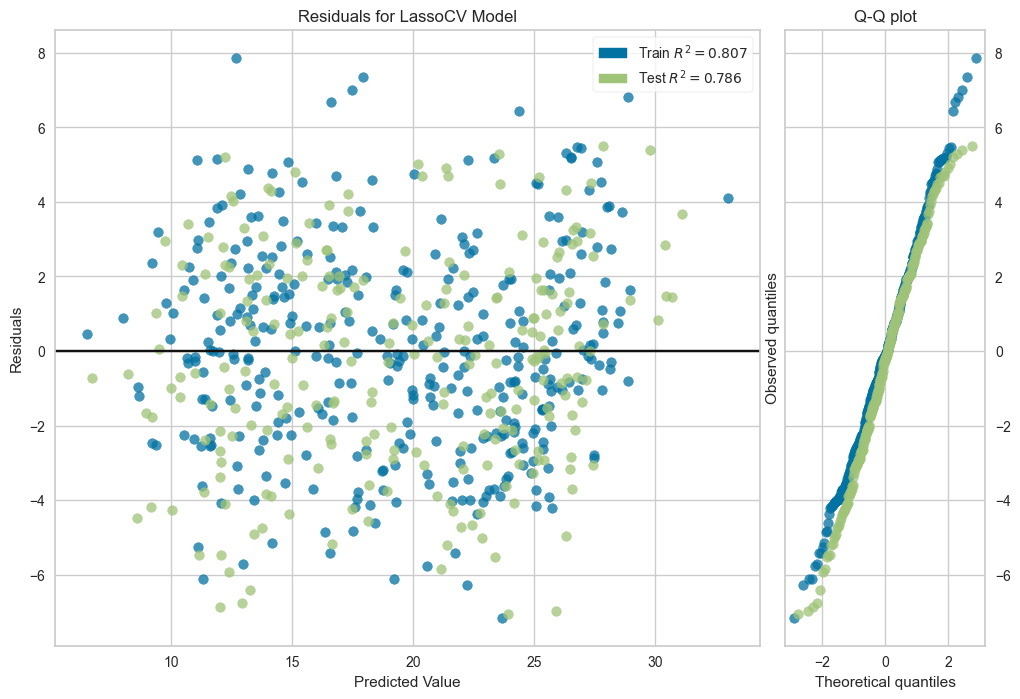

In [28]:
plt.figure(figsize=(12,8));
viz = residuals_plot(lasso_cv, X_train, y_train, X_test, y_test, is_fitted=True, qqplot=True, hist=False);

<Figure size 800x800 with 0 Axes>

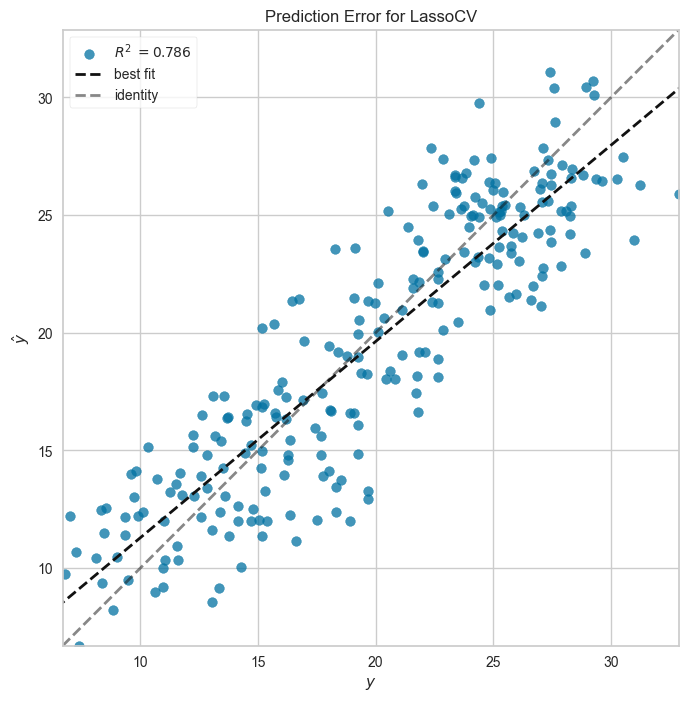

In [29]:
plt.figure(figsize=(8,8))
visualizer = prediction_error(lasso_cv, X_test, y_test, is_fitted=True)

In [30]:
r2_results = pd.DataFrame({'lr':lr_r2, 'ridge_cv':ridge_cv.best_score_, 'lasso_cv':lasso_r2},index=['CV R2'])

r2_results.loc['Train R2', :] =[r2_score(y_train,lr.predict(X_train)),
                                r2_score(y_train,ridge_cv.predict(X_train)),
                                r2_score(y_train,lasso_cv.predict(X_train))]
r2_results.loc['lambda','lr']=0
r2_results.loc['lambda','ridge_cv']=ridge_cv.alpha_
r2_results.loc['lambda','lasso_cv']=lasso_cv.alpha_
r2_results

,lr,ridge_cv,lasso_cv
CV R2,0.790,0.790,0.790
Train R2,0.807,0.807,0.807
lambda,0.000,0.010,0.001


LASSO és el model que  ha obtingut el R2 més alt, tot i això es pot apreciar una millora substancial utilitzant LASSO.

LASSO no ha eliminat cap variable.

Els models obtinguts són decents pero no molt bons.

## c) Importància de les variables

In [31]:
model = sm.OLS(y_train, sm.add_constant(X_train))
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        OLS Regression Results                                        
======================================================================================================
Dep. Variable:     Temperatura-Barcelona - Zona Universitària   R-squared:                       0.807
Model:                                                    OLS   Adj. R-squared:                  0.799
Method:                                         Least Squares   F-statistic:                     97.51
Date:                                        Mon, 28 Oct 2024   Prob (F-statistic):          5.96e-115
Time:                                                00:46:42   Log-Likelihood:                -890.26
No. Observations:                                         366   AIC:                             1813.
Df Residuals:                                             350   BIC:                             1875.
Df Model:                                                  15                                         
Covariance Type:                                    nonrobust                                         
===================================================================================================================
                                                      coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------
const                                              18.5113      0.983     18.828      0.000      16.578      20.445
VisitantesMunicipales-Badalona                     16.5750      2.318      7.150      0.000      12.016      21.134
VisitantesMunicipales-L'Hospitalet de Llobregat   -10.2772      2.461     -4.177      0.000     -15.117      -5.438
VisitantesMunicipales-Sabadell                     10.2732      2.199      4.671      0.000       5.947      14.599
VisitantesMunicipales-Santa Coloma de Gramenet    -17.5383      1.728    -10.148      0.000     -20.937     -14.139
VisitantesMunicipales-Terrassa                     -9.4873      1.909     -4.969      0.000     -13.243      -5.732
VisitantesPais-Alemanya                             1.4276      1.321      1.081      0.280      -1.170       4.025
VisitantesPais-França                               0.3673      1.439      0.255      0.799      -2.464       3.198
VisitantesPais-Regne Unit                          -0.3188      1.487     -0.214      0.830      -3.243       2.605
VisitantesPais-Itàlia                              -2.4641      1.581     -1.559      0.120      -5.573       0.645
VisitantesPais-Estats Units. els                    8.7246      1.147      7.606      0.000       6.469      10.981
VisitantesProvincia-Girona                         14.3400      2.073      6.919      0.000      10.264      18.416
VisitantesProvincia-Illes Balears                   9.5821      1.400      6.846      0.000       6.829      12.335
VisitantesProvincia-Lleida                         -8.2163      1.782     -4.611      0.000     -11.721      -4.712
VisitantesProvincia-Madrid                         -0.7356      1.152     -0.639      0.523      -3.001       1.530
VisitantesProvincia-Tarragona                      -3.4673      2.349     -1.476      0.141      -8.087       1.152
==============================================================================
Omnibus:                        3.111   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.211   Jarque-Bera (JB):                2.999
Skew:                          -0.169   Prob(JB):                        0.223
Kurtosis:                       2.713   Cond. No.                         46.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Si el valor de p (P>|z|) és menor que un llindar (generalment 0,05), podem dir que la variable és rellevant per predir l'objectiu.


Els pesos de les variables són els mateixos que a la regressió lineal.

Les procedències més irrellevants per al canvi de temperatura són Alemanya, França, Itàlia, Regne Unit, Madrid i Tarragona.

Els que contribueixen més a l'augment de temperatura són Badalona, ​​Sabadell, Estats Units, Girona i Illes Balears.

Els que refreden l'ambient de Barcelona són L'Hospitalet de Llobregat, Santa Coloma de Gramenet, Lleida, Terrassa.

## d) Ús de Polynomial Features

In [32]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [33]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_poly, y_train)

y_train_pred_lin = lin_reg.predict(X_train_poly)
y_test_pred_lin = lin_reg.predict(X_test_poly)

print("=== Regresión Lineal con características polinómicas ===")
print(f"Train MSE: {mean_squared_error(y_train, y_train_pred_lin)}")
print(f"Test MSE: {mean_squared_error(y_test, y_test_pred_lin)}")
print(f"Train R^2: {r2_score(y_train, y_train_pred_lin)}")
print(f"Test R^2: {r2_score(y_test, y_test_pred_lin)}")

LinearRegression()

=== Regresión Lineal con características polinómicas ===
Train MSE: 3.349531099591808
Test MSE: 7.767692397174033
Train R^2: 0.9147965256522684
Test R^2: 0.7981467907514206


<Figure size 800x800 with 0 Axes>

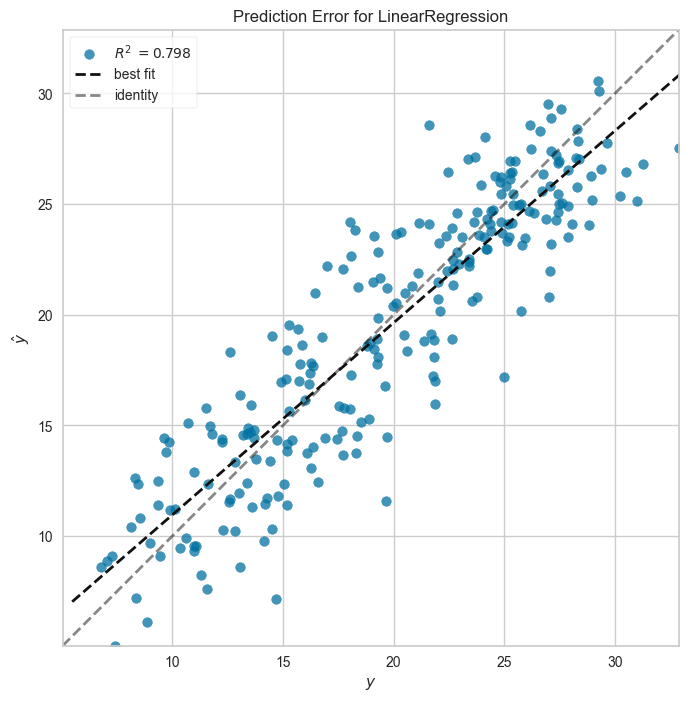

In [34]:
plt.figure(figsize=(8,8))
visualizer = prediction_error(lin_reg, X_test_poly, y_test, is_fitted=True)

In [35]:
lasso_cv_poly = LassoCV(alphas=lambdas,cv=5).fit(X_train_poly,y_train)
coeficientes = lasso_cv_poly.coef_
lasso_r2 =  np.mean(cross_val_score(lasso_cv_poly, X_train_poly,y_train))

print('Best lambda:', lasso_cv.alpha_, 'R2 score:',lasso_r2)
print('Coeficientes:', coeficientes)

eliminadas = np.where(coeficientes == 0)[0]
print('Variables eliminadas (índices):', eliminadas)

retenidas = np.where(coeficientes != 0)[0]
print('Variables retenidas (índices):', retenidas)
y_train_pred_lasso = lasso_cv_poly.predict(X_train_poly)
y_test_pred_lasso = lasso_cv_poly.predict(X_test_poly)

print("=== Regresión LASSO con características polinómicas ===")
print(f"Train MSE: {mean_squared_error(y_train, y_train_pred_lasso)}")
print(f"Test MSE: {mean_squared_error(y_test, y_test_pred_lasso)}")
print(f"Train R^2: {r2_score(y_train, y_train_pred_lasso)}")
print(f"Test R^2: {r2_score(y_test, y_test_pred_lasso)}")

C:\Users\marti.DESKTOP-HBVCDFL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 52.711283858913134, tolerance: 1.1857830824914384
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\marti.DESKTOP-HBVCDFL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 413.2209434932411, tolerance: 1.1857830824914384
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\marti.DESKTOP-HBVCDFL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.082740682552185, tolerance: 1.130953170802048
 

Best lambda: 0.001 R2 score: 0.8207860885086322
Coeficientes: [  0.           8.53337915   0.          -0.         -25.02718232
  -0.07609683   7.15713485  11.43267287   0.          -5.96808311
  19.81862518  21.94647628  14.40077403  -9.4088609    0.
  -7.92189637 -11.8475951   -0.          -1.33860946   6.97527091
  -0.           9.17105328  -0.           7.18764386   2.54397061
  -0.           5.58389873   0.           0.          -1.81405471
  11.54423109   0.           0.           0.          -4.79349559
  -0.          -9.38503346   0.          -0.          -5.20563266
   0.          -0.           0.         -27.81748367  11.65487385
  -0.           7.50517769  -0.           0.           0.
   1.19160245   0.58766381   8.52348817  -0.          -1.90382316
  -5.99701618   0.          -0.           7.84139829  -5.56726383
  -0.          -7.41529363   0.          -9.94336279   7.56300581
   1.39710575   0.           0.          -3.22564132  -0.
  -0.49689042  -0.          -0.       

<Figure size 800x800 with 0 Axes>

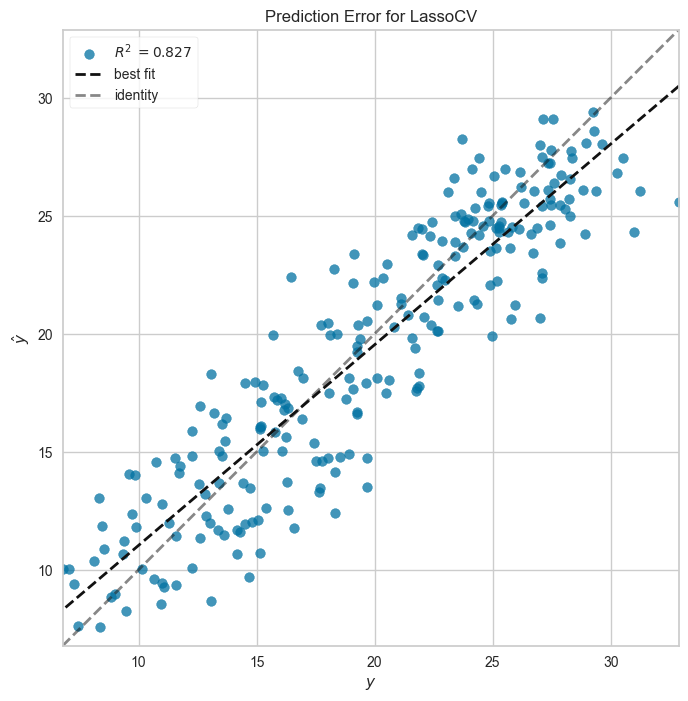

In [36]:
plt.figure(figsize=(8,8))
visualizer = prediction_error(lasso_cv_poly, X_test_poly, y_test, is_fitted=True)

Ara el model de LASSO si que ha descartat variables.

Tant el model de regresió lineal  com el model LASSO han estat lleugerament millorats, sent LASSO el que ha obtingut un millor resultado ara.
Al obtenir un R2 per sobre de 0.8 podem concloure que el model de LASSO és bo.